# Fake Hotel

## Who Will Cancel?

*Fake Hotel* is preparing for the summer vacation season; however, they are concerned that many of their customers cancel at the last minute, leaving them with empty rooms. Some guests simply do not show up, and although a reservation fee is sometimes charged, the majority of profits come when guests pay the remainder upon checking in.

Using their data, they would like you to help identify customers who are more likely to cancel so they can follow up with them. If they do need to cancel, they hope it happens as early as possible.


![](./header.png)

## Data

*Fake Hotel* has two branches: one located in the state capital, "City Hotel," and another in a coastal community, "Resort Hotel."

The data they provided is in CSV format, where each row represents a reservation with the following attributes:

```python
import pandas as pd

data = pd.read_csv('hotel_bookings_training.csv')
data.head()
```


## ¿Qué métricas podemos medir? 

¿Accuracy? pero, y ¿si nos interesa otra cosa?

Nos interesa hallar a TODAS las personas que potencialmente pueden cancelar, y la verdad es que a nuestros clientes no les molesta mucho si les llamamos para confirmar su reserva.

## Ejercicio

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport


import warnings
warnings.filterwarnings('ignore')

In [2]:
hotel_2015_2016_20217 = pd.read_csv("data/hotel_bookings_training.csv")

hotel_2018 = pd.read_excel("data/hotel_booking_test_validate.xlsx",sheet_name='2018')
hotel_2019 = pd.read_excel("data/hotel_booking_test_validate.xlsx",sheet_name='2019')
new_customers = pd.read_excel("data/hotel_booking_test_validate.xlsx",sheet_name='2020')

dfh=pd.concat([hotel_2015_2016_20217,hotel_2018,hotel_2019])

In [3]:
dfh.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,City Hotel,0,21,2015,September,36,1,0,4,2,...,Transient,105.0,0,0,Check-Out,2015-09-05,Timothy George,George_Timothy@mail.com,638-082-2623,************3627
1,City Hotel,0,20,2016,September,38,12,1,0,1,...,Transient,89.0,0,2,Check-Out,2016-09-13,Angela Carpenter,Angela.C@verizon.com,874-747-0095,************7934
2,City Hotel,0,2,2016,March,13,24,0,2,2,...,Transient,134.0,0,1,Check-Out,2016-03-26,Richard Scott,RScott80@verizon.com,311-116-4410,************1822
3,Resort Hotel,1,6,2016,April,17,21,0,1,2,...,Transient,73.0,0,0,Canceled,2016-04-18,Daniel Cooper,DanielCooper@yandex.com,375-297-1783,************7716
4,Resort Hotel,0,40,2015,August,34,20,2,3,2,...,Transient,176.8,1,1,Check-Out,2015-08-25,David Young,David_Young@gmail.com,910-698-3037,************4952


In [4]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220450 entries, 0 to 79263
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           220450 non-null  object 
 1   is_canceled                     220450 non-null  int64  
 2   lead_time                       220450 non-null  int64  
 3   arrival_date_year               220450 non-null  int64  
 4   arrival_date_month              220450 non-null  object 
 5   arrival_date_week_number        220450 non-null  int64  
 6   arrival_date_day_of_month       220450 non-null  int64  
 7   stays_in_weekend_nights         220450 non-null  int64  
 8   stays_in_week_nights            220450 non-null  int64  
 9   adults                          220450 non-null  int64  
 10  children                        220438 non-null  float64
 11  babies                          220450 non-null  int64  
 12  meal                  

## Eliminación de datos personales

In [5]:
# Remove personal information of customers
dfh = dfh.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1)

In [6]:
dfh_obj=dfh.select_dtypes('object')
for column in dfh_obj.columns:
    print(dfh_obj[column].value_counts())
    print('***************************')

hotel
City Hotel      144795
Resort Hotel     75655
Name: count, dtype: int64
***************************
arrival_date_month
October      27271
August       26703
September    26125
July         22775
May          17242
December     16582
April        16498
June         16211
November     15924
March        14615
February     12251
January       8253
Name: count, dtype: int64
***************************
meal
BB           171514
HB            28359
SC            16520
Undefined      2128
FB             1929
Name: count, dtype: int64
***************************
country
PRT    97933
GBR    20412
FRA    18290
ESP    16456
DEU    12188
       ...  
ASM        1
NPL        1
ATF        1
SDN        1
MRT        1
Name: count, Length: 177, dtype: int64
***************************
market_segment
Online TA        96581
Offline TA/TO    48882
Groups           40038
Direct           22925
Corporate        10216
Complementary     1440
Aviation           362
Undefined            6
Name: count, dtyp

In [7]:
dfh['agent'].value_counts().head(10)

agent
9.0      52933
240.0    25658
1.0      18250
6.0       7044
7.0       5998
14.0      5990
250.0     5040
28.0      3105
241.0     3050
3.0       2893
Name: count, dtype: int64

In [8]:
dfh.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                              12
babies                                 0
meal                                   0
country                             1029
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              30206
company         

In [9]:
for column in dfh_obj.columns:
    print(pd.crosstab(dfh[column], dfh['is_canceled']))
    print('***************************')

is_canceled       0      1
hotel                     
City Hotel    84331  60464
Resort Hotel  54874  20781
***************************
is_canceled             0      1
arrival_date_month              
April                9924   6574
August              16444  10259
December            10845   5737
February             7915   4336
January              5811   2442
July                14011   8764
June                 9590   6621
March                9976   4639
May                 10660   6582
November            11183   4741
October             17047  10224
September           15799  10326
***************************
is_canceled       0      1
meal                      
BB           108095  63419
FB              710   1219
HB            18212  10147
SC            10595   5925
Undefined      1593    535
***************************
is_canceled    0    1
country              
ABW            3    0
AGO          306  342
AIA            2    0
ALB           18    4
AND            3    7
...

In [10]:
pd.crosstab(dfh['hotel'], dfh['is_canceled'])

is_canceled,0,1
hotel,,
City Hotel,84331,60464
Resort Hotel,54874,20781


In [11]:
profile = ProfileReport(dfh, title="Pandas Profiling Report")

In [14]:
profile.to_file("EDA/bookings_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 32/32 [00:02<00:00, 11.63it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# Mucha correlación entre is_cancelled y reservation_status. Por tanto, es importante eliminarla para evitar multicolinealidad
dfh.drop(columns={'reservation_status', 'reservation_status_date'}, inplace=True)

In [13]:
dfh.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,0,21,2015,September,36,1,0,4,2,...,A,2,No Deposit,9.0,NaN,0,Transient,105.0,0,0
1,City Hotel,0,20,2016,September,38,12,1,0,1,...,A,0,No Deposit,9.0,NaN,0,Transient,89.0,0,2
2,City Hotel,0,2,2016,March,13,24,0,2,2,...,A,0,No Deposit,9.0,NaN,0,Transient,134.0,0,1
3,Resort Hotel,1,6,2016,April,17,21,0,1,2,...,D,0,No Deposit,NaN,NaN,0,Transient,73.0,0,0
4,Resort Hotel,0,40,2015,August,34,20,2,3,2,...,D,0,No Deposit,250.0,NaN,0,Transient,176.8,1,1


### Split the dataset

In [20]:
is_canceled = dfh['is_canceled'].copy()
hotel_data = dfh.drop(['is_canceled'], axis=1)

In [49]:
#Calculate test and validation set size:
original_count = len(dfh)
training_size = 0.60 # 60% of records
test_size = (1 - training_size) / 2


training_count = int(original_count * training_size)
test_count = int(original_count * test_size)
validation_count = original_count - training_count - test_count

print(f'training_count: {training_count}\ntest_count: {test_count}\nvalidation_count: {validation_count}\noriginal_count: {original_count}\n')

training_count: 132270
test_count: 44090
validation_count: 44090
original_count: 220450



In [50]:
from sklearn.model_selection import train_test_split

train_x, rest_x, train_y, rest_y = train_test_split(hotel_data, is_canceled, train_size=training_count)
test_x, validate_x, test_y, validate_y = train_test_split(rest_x, rest_y, train_size=test_count)

print(len(train_x), len(test_x),len(validate_x))

132270 44090 44090


## Modificaciones en columnas para la aplicación del modelo de ML

### One Hot Encoding

In [51]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

In [52]:
one_hot_encoder.fit(train_x[['hotel']])
one_hot_encoder.transform(train_x[['hotel']])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

## Binarization

### Instead of counting the number of requests, simply understand whether the customer made requests or not.

```python
data['has_special_requests'] = data['total_of_special_requests'] > 0
```

In [53]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [54]:
_ = train_x.copy()
binarizer.fit(_[['total_of_special_requests']])
_['has_made_special_requests'] = binarizer.transform(train_x[['total_of_special_requests']])

_[['total_of_special_requests', 'has_made_special_requests']].sample(15)

,total_of_special_requests,has_made_special_requests
19519,1,1
66978,0,0
38662,0,0
59514,0,0
14408,1,1
113804,1,1
30155,1,1
84793,2,1
7506,0,0
37982,0,0


In [55]:
print(train_x['total_of_special_requests'].unique())
print(_['has_made_special_requests'].unique())

[1 2 0 4 3 5]
[1 0]


## Variables to Scale

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
data[['lead_time', 'adr']] = scaler.fit_transform(data[['lead_time', 'adr']])
```

- Transform high values into values between -1 and 1.
- Why scale? The idea is to bring all columns into the same range so that no variable has a greater impact than another.

In [56]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [57]:
_ = train_x.copy()
scaler.fit(_[['adr']])
_['adr_scaled'] = scaler.transform(train_x[['adr']])

_[['adr', 'adr_scaled']].sample(10)

,adr,adr_scaled
9428,68.00,-0.400000
12673,101.00,0.200000
33596,84.45,-0.100909
116920,130.00,0.727273
48351,84.00,-0.109091
19069,111.65,0.393636
30919,49.00,-0.745455
22712,68.75,-0.386364
16290,250.00,2.909091
38278,58.90,-0.565455


In [58]:
_['adr'].describe()

count    132270.000000
mean         97.883353
std          50.801294
min           0.000000
25%          65.000000
50%          90.000000
75%         120.000000
max        5400.000000
Name: adr, dtype: float64

In [59]:
_['adr_scaled'].describe()

count    132270.000000
mean          0.143334
std           0.923660
min          -1.636364
25%          -0.454545
50%           0.000000
75%           0.545455
max          96.545455
Name: adr_scaled, dtype: float64

<Axes: >

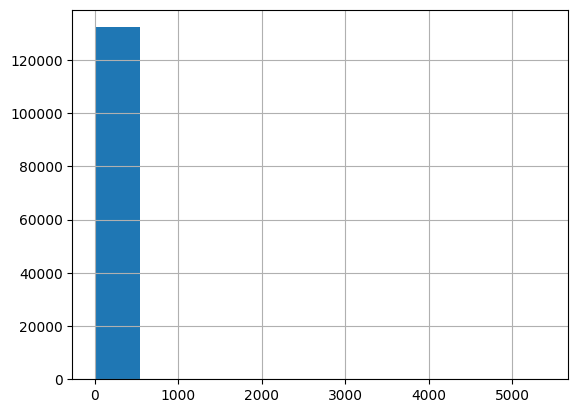

In [60]:
_['adr'].hist()

<Axes: >

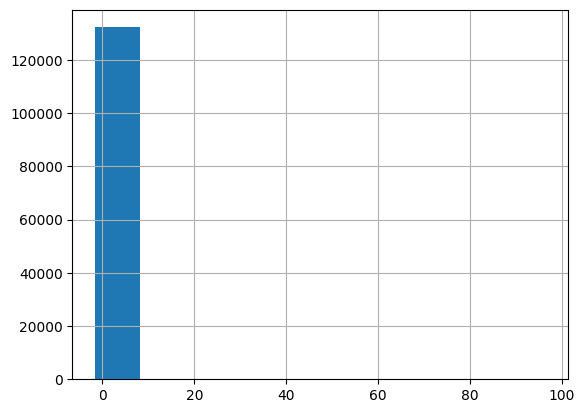

In [61]:
_['adr_scaled'].hist()

### Armado del Pipeline

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

In [63]:
one_hot_encoding = ColumnTransformer([
    (
        'one_hot_encode',
        OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
        [
            "hotel",
            "meal", 
            "distribution_channel", 
            "reserved_room_type", 
            "assigned_room_type", 
            "customer_type"
        ]
    )
])

In [64]:
binarizer = ColumnTransformer([
    (
        'binarizer',
        Binarizer(),
        [
            "total_of_special_requests", 
            "required_car_parking_spaces", 
            "booking_changes", 
            "previous_bookings_not_canceled", 
            "previous_cancellations",
        ]
    )
])
    
one_hot_binarized = Pipeline([
    ("binarizer", binarizer),
    ("one_hot_encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
])

In [65]:
scaler = ColumnTransformer([
    ("scaler", 
     RobustScaler(), 
     [
         "adr"
    ])
])

In [66]:
passthrough = ColumnTransformer([
    (
        "passthrough",
        "passthrough",
        [
            "stays_in_week_nights",
            "stays_in_weekend_nights",
        ]
    )
])

In [67]:
feature_engineering_pipeline = pipe = Pipeline(
    [
        (
            "features",
            FeatureUnion(
                [
                    ("categorical", one_hot_encoding),
                    ("categorical_binarized", one_hot_binarized),
                    ("scaled", scaler),
                    ("pass", passthrough),
                ]
            ),
        )
    ]
)

In [68]:
transformed = feature_engineering_pipeline.fit_transform(train_x)   
transformed.shape

(132270, 51)

In [69]:
feature_engineering_pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('categorical',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                sparse_output=False),
                                                                                  ['hotel',
                                                                                   'meal',
                                                                                   'distribution_channel',
                                                                                   'reserved_room_type',
                                                                                   'assigned_room_type',
                                                                                   'customer_type'])])),
                                                ('categorical_binarized',
                                                 Pipeline(steps=[('binarizer',
                                                                  ColumnTrans...
                                                                                                    'previous_bookings_not_canceled',
                                                                                                    'previous_cancellations'])])),
                                                                 ('one_hot_encoder',
                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                sparse_output=False))])),
                                                ('scaled',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  RobustScaler(),
                                                                                  ['adr'])])),
                                                ('pass',
                                                 ColumnTransformer(transformers=[('passthrough',
                                                                                  'passthrough',
                                                                                  ['stays_in_week_nights',
                                                                                   'stays_in_weekend_nights'])]))]))])

## Model Training

In [70]:
# Get a fresh copy of the pipeline
from sklearn.base import clone

feature_transformer = clone(feature_engineering_pipeline)

features_train_x = feature_transformer.fit_transform(train_x)
features_validate_x = feature_transformer.transform(validate_x)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

model.fit(features_train_x, train_y)

## Model Validation

In [48]:
from sklearn.metrics import accuracy_score, recall_score

pred_y = model.predict(features_validate_x)

print(accuracy_score(validate_y, pred_y))
print(recall_score(validate_y, pred_y))

0.8821047856656838
0.8269834430971872


## Hiperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Example: RandomForestClassifier
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(features_train_x, train_y)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate
y_pred = best_model.predict(test_x)

## Pipeline Final

In [45]:
final_inference_pipeline = Pipeline([
    ("feature_engineering", clone(feature_engineering_pipeline)),
    ("model", RandomForestClassifier(n_estimators=100))
])

In [46]:
final_training_dataset = pd.concat([train_x, test_x])
final_training_response = pd.concat([train_y, test_y])
final_inference_pipeline.fit(final_training_dataset, final_training_response)

Pipeline(steps=[('feature_engineering',
                 Pipeline(steps=[('features',
                                  FeatureUnion(transformer_list=[('categorical',
                                                                  ColumnTransformer(transformers=[('one_hot_encode',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False),
                                                                                                   ['hotel',
                                                                                                    'meal',
                                                                                                    'distribution_channel',
                                                                                                    'reserved_room_type',
                                                                                                    'assigned_room_type',
                                                                                                    'customer_type'])])),
                                                                 ('categorical_binarized',
                                                                  P...
                                                                                                                     'previous_cancellations'])])),
                                                                                  ('one_hot_encoder',
                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                 sparse_output=False))])),
                                                                 ('scaled',
                                                                  ColumnTransformer(transformers=[('scaler',
                                                                                                   RobustScaler(),
                                                                                                   ['adr'])])),
                                                                 ('pass',
                                                                  ColumnTransformer(transformers=[('passthrough',
                                                                                                   'passthrough',
                                                                                                   ['stays_in_week_nights',
                                                                                                    'stays_in_weekend_nights'])]))]))])),
                ('model', RandomForestClassifier())])

## Testing Model

In [47]:
test_pred_y = final_inference_pipeline.predict(test_x)

print(accuracy_score(test_pred_y, test_y))
print(recall_score(test_pred_y, test_y))

0.9449081424359265
0.9370004995004995


In [55]:
new_customers['will_cancel'] = final_inference_pipeline.predict(new_customers)
new_customers[['proba_check_in', 'proba_cancel']] = final_inference_pipeline.predict_proba(new_customers)

In [61]:
cancel = new_customers[['name', 'phone-number', 'will_cancel', 'proba_cancel']].sort_values(by='proba_cancel', ascending=False)
cancel = cancel[cancel['will_cancel'] == 1]

In [67]:
cancel.tail()

,name,phone-number,will_cancel,proba_cancel
53,Traci Smith,610-842-6627,1,0.668296
57,Nicholas Doyle,344-642-0763,1,0.630000
60,Brandon Delgado,560-927-0003,1,0.620139
25,David Small,429-167-6765,1,0.616000
11,Ashley Smith,657-721-1933,1,0.603944


In [65]:
cancel[cancel['proba_cancel'] > 0.89].shape[0]

17

In [ ]:
cancel = cancel[cancel['proba_cancel'] > 0.89].shape[0]

In [ ]:
pd.to_csv(cancel,index=False)